In [45]:
## Visualizzazione del dataframe    

In [1]:
## Moduli necessari per il caricamento e la pulizia dei dati

import psycopg2
import pandas as pd

# Parametri di connessione al database
db_params = {
    'host': 'localhost',
    'database': 'HARPA',
    'user': 'user',
    'password': 'password',
    'port': '5432',
}

# Query SQL per la SELECT
select_query = 'SELECT * FROM harpa.aggregazione_fascia_oraria WHERE 1=1 AND EXTRACT(YEAR from giorno) = 2023'

# Funzione per eseguire la query e restituire un DataFrame
def fetch_data_to_dataframe(query, connection_params):
    # Connessione al database
    connection = psycopg2.connect(**connection_params)
    
    # Esecuzione della query e caricamento dei dati nel DataFrame
    data_frame = pd.read_sql_query(query, connection)
    
    # Chiusura della connessione
    connection.close()
    
    return data_frame

# Eseguire la query e ottenere il DataFrame
df = fetch_data_to_dataframe(select_query, db_params)
df_prophet = fetch_data_to_dataframe(select_query, db_params)

# Visualizzare il DataFrame
print(df)
print(df_prophet)


         giorno giorno_settimana  giorno_settimana_num fascia_oraria  \
0    2023-01-01           Sunday                   0.0   09:00-19:00   
1    2023-01-01           Sunday                   0.0   19:00-00:00   
2    2023-01-02           Monday                   1.0   09:00-19:00   
3    2023-01-02           Monday                   1.0   19:00-00:00   
4    2023-01-03          Tuesday                   2.0   09:00-19:00   
..          ...              ...                   ...           ...   
944  2023-10-20           Friday                   5.0   00:00-09:00   
945  2023-10-21         Saturday                   6.0   00:00-09:00   
946  2023-10-22           Sunday                   0.0   00:00-09:00   
947  2023-10-23           Monday                   1.0   00:00-09:00   
948  2023-10-24          Tuesday                   2.0   00:00-09:00   

     fascia_oraria_num  kilowatt_edificio_diff  kilowatt_data_center_diff  \
0                    2                   40.70            

/tmp/ipykernel_13435/323607843.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = pd.read_sql_query(query, connection)
/tmp/ipykernel_13435/323607843.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = pd.read_sql_query(query, connection)


In [2]:
# Importare i moduli necessari per la regressione lineare
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:

print(df.head())

print(df.columns)



       giorno giorno_settimana  giorno_settimana_num fascia_oraria  \
0  2023-01-01           Sunday                   0.0   09:00-19:00   
1  2023-01-01           Sunday                   0.0   19:00-00:00   
2  2023-01-02           Monday                   1.0   09:00-19:00   
3  2023-01-02           Monday                   1.0   19:00-00:00   
4  2023-01-03          Tuesday                   2.0   09:00-19:00   

   fascia_oraria_num  kilowatt_edificio_diff  kilowatt_data_center_diff  \
0                  2                   40.70                      64.00   
1                  3                   43.70                      31.58   
2                  2                  164.00                      64.00   
3                  3                   44.00                      31.40   
4                  2                  149.29                      63.60   

   kilowatt_fotovoltaico_diff  kilowatt_ufficio_diff  temperature  rain  \
0                        39.0                  15.70 

In [4]:
df.describe()

,giorno_settimana_num,fascia_oraria_num,kilowatt_edificio_diff,kilowatt_data_center_diff,kilowatt_fotovoltaico_diff,kilowatt_ufficio_diff,temperature,rain,cloud_cover
count,949.000000,949.000000,949.000000,946.000000,949.000000,949.000000,317.000000,317.000000,317.000000
mean,2.988409,1.998946,61.081307,51.010603,28.854847,39.086807,15.095818,0.109849,32.099510
std,2.004971,0.817142,35.272069,14.374110,42.123876,43.864172,6.826468,0.375814,31.060805
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.125610,0.000000,0.000000
25%,1.000000,1.000000,41.000000,32.000000,1.000000,12.680000,9.447830,0.000000,3.733330
50%,3.000000,2.000000,59.000000,57.005000,4.000000,19.000000,16.375610,0.000000,22.433330
75%,5.000000,3.000000,76.000000,62.552500,50.200000,47.590000,20.458950,0.022220,57.877780
max,6.000000,3.000000,251.650000,78.260000,136.850000,257.690000,29.020060,4.266670,99.688890


Mean Absolute Error: 21.960868119240555
Mean Squared Error: 882.7265702236419
Root Mean Squared Error: 29.710714737677414


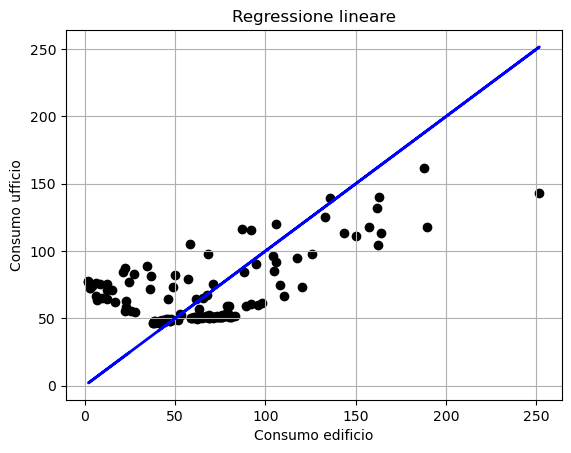

In [5]:
df['giorno'] = pd.to_datetime(df['giorno'])
# df.set_index('giorno', inplace=True)

X = df[['kilowatt_ufficio_diff']] # Variabile indipendente
Y = df[['kilowatt_edificio_diff']] # Variabile dipendente

X.head()
Y.head()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestamento del modello
model.fit(X_train, Y_train)

# Predizione dei valori di consumo

Y_pred = model.predict(X_test)

# Valutazione del modello

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))

# Visualizzazione del modello

plt.scatter(Y_test, Y_pred, color='black')
plt.plot(Y_test, Y_test, color='blue', linewidth=2) # Linea di riferimento
plt.xlabel('Consumo edificio')
plt.ylabel('Consumo ufficio')
plt.title('Regressione lineare')
plt.grid()
plt.show()




Mean Absolute Error: 14.103410944610392
Mean Squared Error: 491.969055924463
Root Mean Squared Error: 22.18037546851863


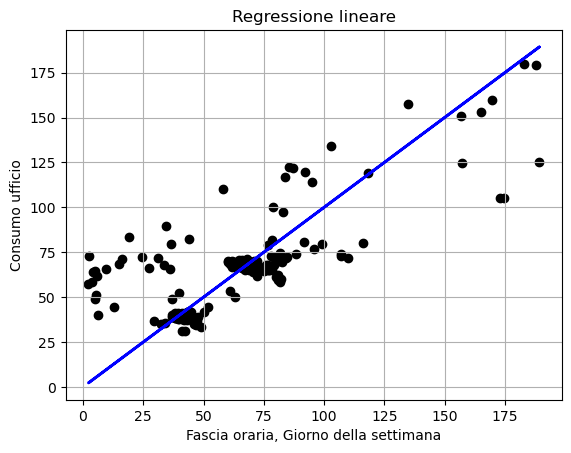

In [6]:
df['giorno'] = pd.to_datetime(df['giorno'])
# df.set_index('giorno', inplace=True)

df = df.fillna(0)

X = df[['kilowatt_ufficio_diff', 'kilowatt_data_center_diff', 'fascia_oraria_num', 'giorno_settimana_num']] # Variabile indipendente
Y = df[['kilowatt_edificio_diff']] # Variabile dipendente

X.head()
Y.head()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=0)

# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestamento del modello
model.fit(X_train, Y_train)

# Predizione dei valori di consumo

Y_pred = model.predict(X_test)

# Valutazione del modello

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))

# Visualizzazione del modello

plt.scatter(Y_test, Y_pred, color='black')
plt.plot(Y_test, Y_test, color='blue', linewidth=2) # Linea di riferimento
plt.xlabel('Fascia oraria, Giorno della settimana')
plt.ylabel('Consumo ufficio')
plt.title('Regressione lineare')
plt.grid()
plt.show()


